In [1]:
# Install PyTorch using pip inside Jupyter Notebook
!pip install torch torchvision torchaudio


   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 2.1/212.5 MB 11.7 MB/s eta 0:00:19
    --------------------------------------- 4.5/212.5 MB 10.7 MB/s eta 0:00:20
   - -------------------------------------- 6.0/212.5 MB 10.0 MB/s eta 0:00:21
   - -------------------------------------- 7.3/212.5 MB 9.4 MB/s eta 0:00:22
   - -------------------------------------- 8.7/212.5 MB 8.4 MB/s eta 0:00:25
   - -------------------------------------- 10.5/212.5 MB 8.4 MB/s eta 0:00:25
   -- ------------------------------------- 12.1/212.5 MB 8.3 MB/s eta 0:00:25
   -- ------------------------------------- 13.9/212.5 MB 8.2 MB/s eta 0:00:25
   -- ------------------------------------- 15.5/212.5 MB 8.2 MB/s eta 0:00:24
   --- ------------------------------------ 17.8/212.5 MB 8.5 MB/s eta 0:00:23
   --- ------------------------------------ 19.9/212.5 MB 8.7 MB/s eta 0:00:23
   ---- ----------------------------------- 21.8/212.5 MB 8.8 

In [2]:
import torch
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


Using cache found in C:\Users\SIDDHI/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-4-28 Python-3.10.16 torch-2.7.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\SIDDHI/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


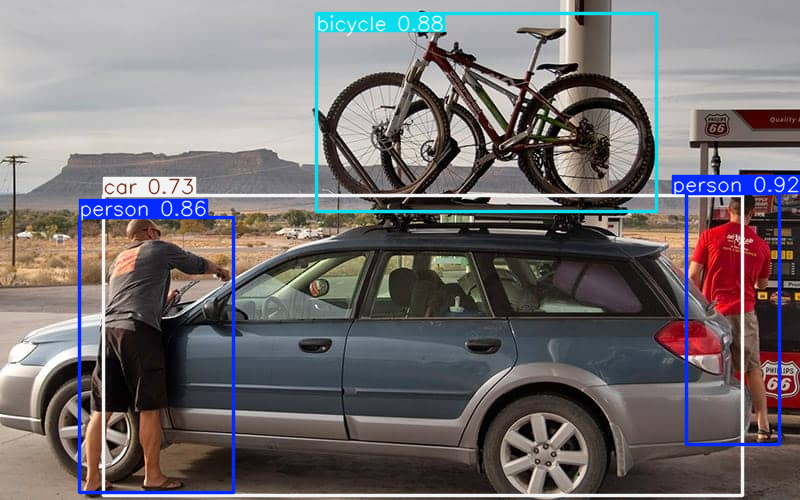

         xmin        ymin        xmax        ymax  confidence  class     name
0  686.220520  193.232727  779.098328  444.755859    0.916284      0   person
1  316.023346   13.692045  656.664429  211.821747    0.881429      1  bicycle
2   79.629623  217.878174  233.927795  492.893829    0.864145      0   person
3  103.935089  195.533783  742.707214  495.057953    0.731251      2      car


In [4]:
# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Correct repository
model.conf = 0.25  # Set confidence threshold

def detect_objects(image_path):
    """Detect objects in an image using YOLOv5."""
    if not os.path.exists(image_path):
        print(f"Error: Image '{image_path}' not found.")
        return None
    image = Image.open(image_path).convert("RGB")  # Ensure correct format
    results = model(image)  # Perform inference
    results.show()

    detections = results.pandas().xyxy[0]  # Get bounding boxes
    if detections.empty:
        print("No objects detected.")
        return None

    return detections

def plot_detections(image_path, detections):
    """Plot detected objects on the image."""
    if detections is None:
        print("No objects to plot.")
        return
    image = Image.open(image_path).convert("RGB")
    image = image.resize((400, 200))  # Resize image before drawing
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = f"{row['name']} ({row['confidence']:.2f})"
        draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
        draw.text((x1, y1 - 10), label, fill="green", font=font)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    image_path = "object_detection.jpg"  # Ensure this file exists in the working directory
    detections = detect_objects(image_path)
    if detections is not None:
        print(detections)
        plot_detections(image_path, detections)
